## Training Models - Intro

### Linear Regression

* y = theta0 + (theta1 * x1) + (theta2 * x2) + ...
*   = h(theta)(x) 
*   = theta^T (dot) x --- theta^T = theta vector, transposed (row instead of col)

* Training a model = finding theta that minimizes error function (ex: MSE)

![alt text](MSE-cost-function-linear-regression.png)

### Normal Equation: finds theta that minimizes cost function

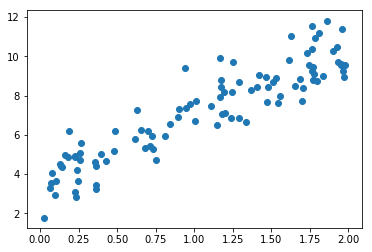

In [1]:
# generate some data
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [2]:
# find theta. 
# 1) use NumPy's matrix inverse function.
# 2) use dot method for matrix multiply.

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# results:
print(theta_best) # compare to generated data: y = 4 + 3x + noise

[[ 3.58859665]
 [ 3.41876053]]


[[  3.58859665]
 [  7.00735719]
 [ 10.42611772]]


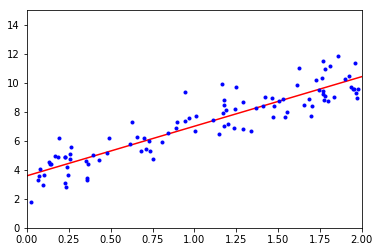

In [3]:
# make some predictions

X_new     = np.array([[0],[1],[2]])
X_new_b   = np.c_[np.ones((3, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

# then plot

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# Scikit equivalent
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X,y)
print("intercept & coefficient:\n", lin_reg.intercept_, lin_reg.coef_)
print("predictions:\n", lin_reg.predict(X_new))

intercept & coefficient:
 [ 3.58859665] [[ 3.41876053]]
predictions:
 [[  3.58859665]
 [  7.00735719]
 [ 10.42611772]]


### Gradient Descent

In [5]:
# Gradient Descent - Batch
# (Batch: math includes full training set X.)

# need to find partial derivative (slope) of the cost function
# for each model parameter (theta).

theta_path_bgd = []

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)
    
print(theta)

[[ 3.58859665]
 [ 3.41876053]]


In [6]:
# Gradient Descent - Stochastic
# Stochastic: finds gradients based on random instances
# adv: better for huge datasets
# dis: much more erratic than batch GD 
#      -- good for avoiding local minima
#      -- bad b/c may not find optimum sol'n

# simulated annealing helps. (gradually reduces learning rate)

theta_path_sgd = []

n_epochs, t0, t1 = 50, 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi =   y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
print(theta)

[[ 3.6036273 ]
 [ 3.44079196]]


In [7]:
# SGD Regression using Scikit:

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[ 3.57214013] [ 3.39609675]


In [8]:
# Gradient Descent - MiniBatch
# adv: performance boost via GPUs

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

import numpy.random as rnd

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = rnd.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
        
    for i in range(0, m, minibatch_size):
        t += 1
        
        xi = X_b_shuffled[i:i+minibatch_size]
        yi =   y_shuffled[i:i+minibatch_size]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
print(theta)

[[ 3.70412445]
 [ 3.54124923]]


In [9]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

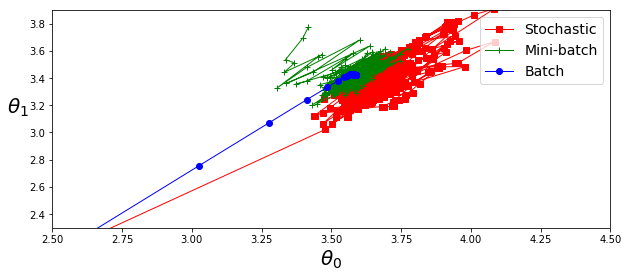

In [10]:
plt.figure(figsize=(10,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

### Polynomial Regression

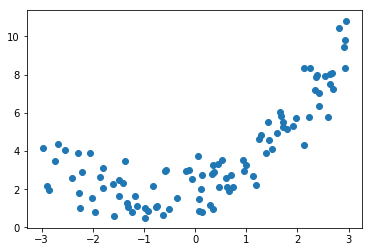

In [11]:
# example quadratic equation + noise: y = 0.5*X^2 + X + 2 + noise
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

In [12]:
# fit using Scikit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

# caution: PolynomialFeatures converts array of n features
# into array of (n+d)!/d!n! features -- combinatorial explosions possible :-)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
print(poly_features)

# X_poly: original feature of X, plus its square.
X_poly = poly_features.fit_transform(X)

#print(X, X_poly)
print(X[0], X_poly[0])

# fit it:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# result estimate: 0.48x(1)^2 + 0.99x(2) + 2.06
# original:        0.50x(1)^2 + 1.00x(2) + 2.00 + gaussian noise

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
[ 2.38942838] [ 2.38942838  5.709368  ]
[ 1.9735233] [[ 0.95038538  0.52577032]]


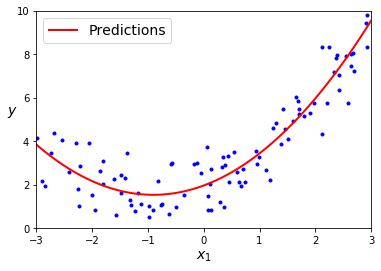

In [13]:
X_new      = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new      = lin_reg.predict(X_new_poly)

#testme = np.linspace(-3,3,20)
#print(testme, testme.reshape(20,1))

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

### Learning Curves

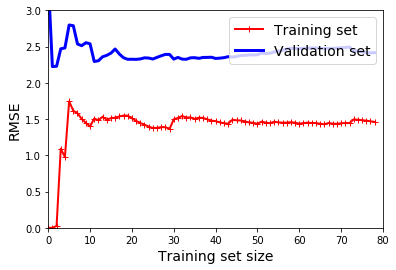

In [14]:
# another way to check for underfit & overfit:
# use learning curve plots to see performance vs training set size.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# train model multiple times on various training subsets (of various sizes)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
#save_fig("underfitting_learning_curves_plot")
plt.show()


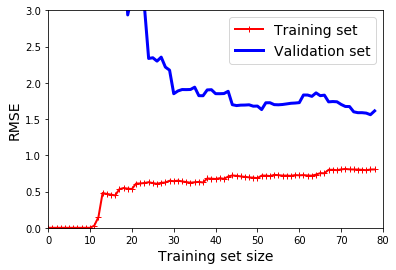

In [15]:
# repeat exercise for 10th-degree polynomial

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])
plt.show()

# note: training error rate much lower than on Linear Regression
# note: training/validation gap closes to zero. good fit?

### Bias/Variance Tradeoff

* Bias: the part of generalization error due to wrong assumptions.
* Variance: due to model sensitivity to small training variations. (More common in high-dimensional models.)
* Irreducibility: due to data noise.

* Rule of thumb: increasing model complexity increases variance & reduces bias (and vice versa.)

### Regularization

* Used to reduce overfit by constraining the model (ex: reducing the # of degrees in a polynomial).

In [16]:
# Ridge -- regularization term added to cost function.
# alpha param -- forces model weights to minimal values. higher alpha = "flatter" function (converge to mean)

* Cost function:
![ridge-regression-cost-function](pics/ridge-regression-cost-function.png)

array([[ 1.00650911],
       [ 1.55071465],
       [ 1.73211649],
       [ 2.09492018]])

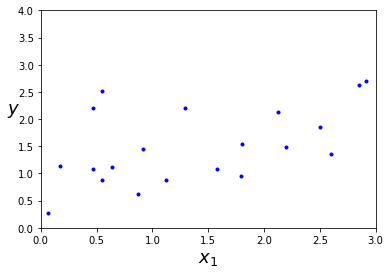

In [17]:
# build dataset

import numpy.random as rnd

rnd.seed(42)
m = 20
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# plot it
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 4])

# apply Ridge regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[0.0],[1.5],[2.0],[3.0]])

In [18]:
# Ridge using SGD:
sgd_reg = SGDRegressor(penalty="l2") 
sgd_reg.fit(X,y.ravel())
ridge_reg.predict([[0.0],[1.5],[2.0],[3.0]])

array([[ 1.00650911],
       [ 1.55071465],
       [ 1.73211649],
       [ 2.09492018]])

In [19]:
# Lasso -- similar to Ridge, also adds regularization term
# uses L1 norm (instead of 1/2 square of L2 norm, as in Ridge.)
# -- tends to force least important features to zero.

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[0.0],[1.5],[2.0],[3.0]])

array([ 1.14537356,  1.53788174,  1.66871781,  1.93038993])

In [20]:
# Elastic Net -- midddle ground.
# regularization = mix of Ridge & Lasso (mix ratio "r")

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[0.0],[1.5],[2.0],[3.0]])

array([ 1.08639303,  1.54333232,  1.69564542,  2.00027161])

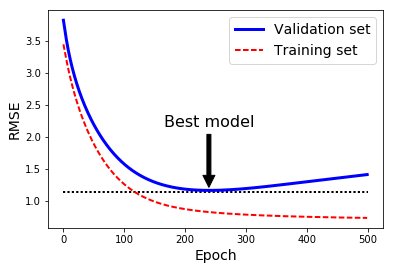

In [21]:
# Early Stopping -- stop training when minimum validation error reached

# build dataset
rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_scaler = Pipeline((
    ("poly_features", PolynomialFeatures(
        degree=90, 
        include_bias=False)),
    ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)

    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict   = sgd_reg.predict(X_val_poly_scaled)

    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch    = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

### Logistic Regression
* commonly used to est probability of instance belonging to specified class. positive if >50% (labeled "1"), otherwise labeled "0".

![Logistic Regression model probability](logistic-regression-probability.png)

* logistic is a sigmoid function, outputs 0<n<1.

![Logistic function](logistic-function.png)

* cost function = average over all training data. It is convex, so gradient descent will find global minimum.

In [22]:
#from sklearn import datasets
#iris = datasets.load_iris()

import numpy as np

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

dict_keys(['target_names', 'DESCR', 'data', 'target', 'feature_names'])


[[ 0.98552764  0.01447236]
 [ 0.98541511  0.01458489]
 [ 0.98530171  0.01469829]
 ..., 
 [ 0.02620686  0.97379314]
 [ 0.02600703  0.97399297]
 [ 0.02580868  0.97419132]]


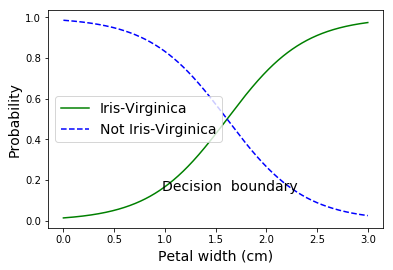

In [23]:
# train a LR model

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

# predict probability of flowers with petal widths = 0-3cm 
X_new             = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba           = log_reg.predict_proba(X_new)
print(y_proba)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

In [24]:
# what's the prediction for petal length = 1.5 or 1.7cm?
print(log_reg.predict([[1.5], [1.7]]))

[0 1]


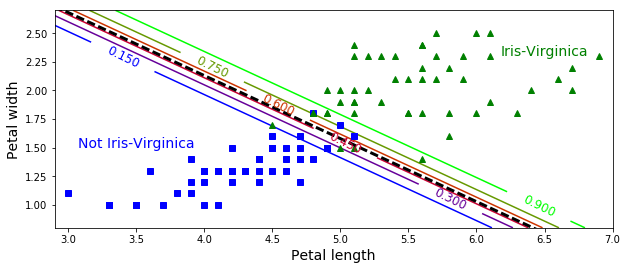

In [25]:
# Logistic Regressin contour plot
# with multiple decision boundaries (not just 50%)

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
         np.linspace(2.9, 7, 500).reshape(-1, 1),
         np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

# ravel(): return contiguous flattened array
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

### Softmax Regression (Multinomial Logistic Regression)

* **Predicts one class at a time (multiclass, not multioutput). Use only for mutually exclusive classes.**
* Scoring for K classes: ![softmax-score-for-class K](pics/softmax-score-for-class-k.png)
* Softmax function (aka normalized exponential):    ![softmax-function](softmax-function.png)
* Prediction: ![softmax prediction](pics/softmax-prediction.png)
* Uses **cross entropy** to minimize cost function. (Same as log loss, used for Logistic Regression, when k=2.)
![cross entropy](pics/cross-entropy-cost-function.png)

In [26]:
# use Softmax to classify iris flowers

X = iris["data"][:, (2, 3)] # petal length, width
y = iris["target"]

# Scikit LR can be switched to Softmax with "multinomial" setting.
# also defaults to L2 regularization (control with C parameter)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# predict iris 5cm long, 2cm wide:

softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5,2]])

array([[  6.33134078e-07,   5.75276067e-02,   9.42471760e-01]])

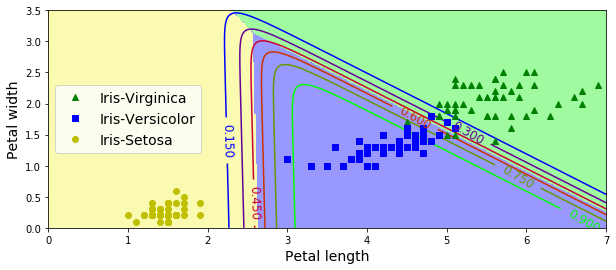

In [27]:
# softmax contour plot

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()